# Exploration of Croatian real-estate data with pandas and seaborn

This notebook explores a dataset of real-estate listings for the Croatian property market, including a few preliminary analyses demonstrating the usefulness of data manipulation with pandas, and visualisation with seaborn. 

This notebook is created for reference purposes only, to illustrate the data analysis techniques in this repository. Data is not avaliable for this notebook. See README.md for more details. 

In [1]:
%matplotlib notebook 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
sns.set()

# Load the dataset

In [2]:
df = pd.read_csv(DATA_NOT_AVALIABLE,na_values=['nan'])
df = df.set_index('advert_id')

# 0. Data preprocessing

### 0.1 Convert time/dates to datetime objects.

In [3]:
df['user_registration_date'] = pd.to_datetime(df['user_registration_date'], format='%Y-%m-%d')
df['advert_upload_date'] = pd.to_datetime(df['advert_upload_date'], format='%Y-%m-%d')
df['advert_last_update_date'] = pd.to_datetime(df['advert_last_update_date'], format='%Y-%m-%d %H:%M:%S')

### 0.2 Determine a set of data which will not be included in the analysis

#### Removal by price

Listing prices are not indicative of sale price (when, or even if, the house is sold). As such, any prices that are likely to be unreasonable sales prices (e.g. far too low for the Croatian housing market, or far too high) are removed from the dataset.

<IPython.core.display.Javascript object>


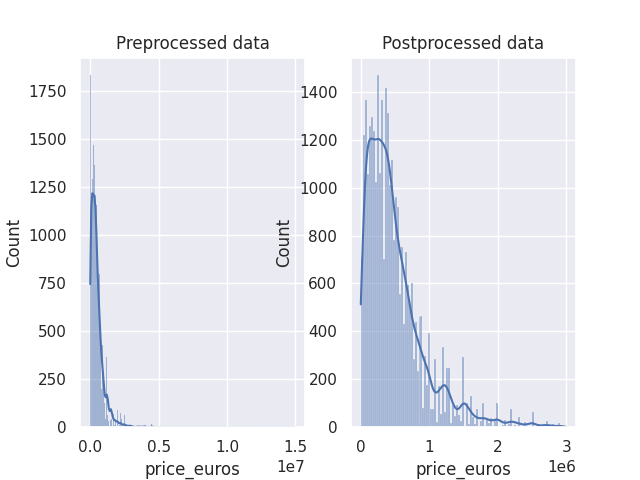

Removed rows where price < €5000: 1258 rows removed
Removed rows where price > €3,000,000: 139 rows removed


[Text(0.5, 1.0, 'Postprocessed data')]

In [4]:
# Plot the distribution of prices
fig, ax = plt.subplots(1,2)
sns.histplot(df, x='price_euros', kde=True,ax=ax[0]).set(title='Preprocessed data')

# Remove data outside a reasonable range
print('Removed rows where price < €5000: {} rows removed'.format(len(df[df['price_euros'] < 5000])))
df = df[df['price_euros'] > 1000]
print('Removed rows where price > €3,000,000: {} rows removed'.format(len(df[df['price_euros'] > 3000000])))
df = df[df['price_euros'] < 3000000]

# Plot the new distribution of prices
sns.histplot(df, x='price_euros', kde=True,ax=ax[1]).set(title='Postprocessed data')

#### Removal by area (m^2)

Many listings consist of several buildings (farmhouses, apartments, restaurants, garages etc.) so the listing area can often be confusing, or is only partially explained. To address this, area outside of a reasonable range is removed from the dataset. 

<IPython.core.display.Javascript object>


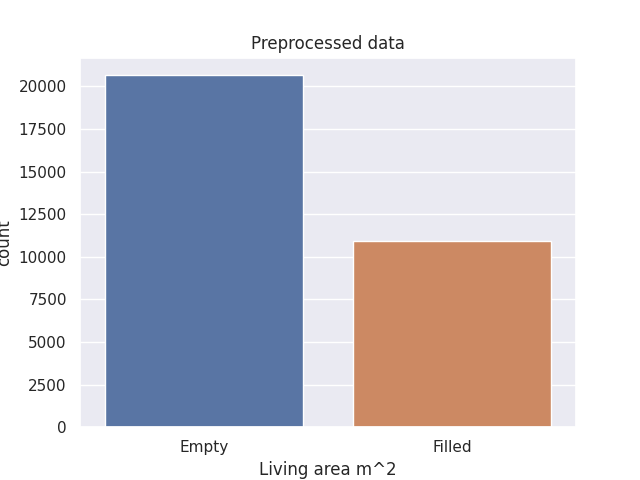

In [5]:
# Plot the distribution of area
fig, ax = plt.subplots(1,1)
g= sns.countplot(x=pd.notna(df['Living area m^2']),ax=ax).set(title='Preprocessed data')
ax.set_xticks(range(2), labels=['Empty','Filled'])

<IPython.core.display.Javascript object>


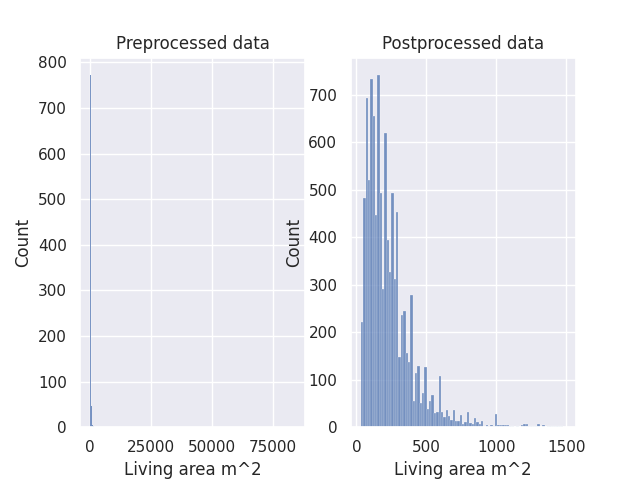

Removed rows where house m2 < 30m2: 202 rows removed
Removed rows where house m2 > 1500m2: 183 rows removed
Removed rows where land m2 > 10000m2: 382 rows removed


[Text(0.5, 1.0, 'Postprocessed data')]

In [6]:
# Show a histogram of the area, and remove those outside of a reasonable range
fig, ax = plt.subplots(1,2)
sns.histplot(df, x='Living area m^2',ax=ax[0]).set(title='Preprocessed data')

# Remove data outside a reasonable range
# Keep any rows that have NaN, as very often this field isn't filled out
print('Removed rows where house m2 < 30m2: {} rows removed'.format(len(df[df['Living area m^2'] < 30])))
df = df[(df['Living area m^2'] > 30) | (pd.isna(df['Living area m^2']))]
print('Removed rows where house m2 > 1500m2: {} rows removed'.format(len(df[df['Living area m^2'] > 1500])))
df = df[(df['Living area m^2'] < 1500) | (pd.isna(df['Living area m^2']))]
print('Removed rows where land m2 > 10000m2: {} rows removed'.format(len(df[df['Land area m^2'] > 10000])))
df = df[(df['Land area m^2'] < 10000) | (pd.isna(df['Land area m^2']))]

# Plot the new distribution of area
sns.histplot(df, x='Living area m^2',ax=ax[1]).set(title='Postprocessed data')

#### Removal by time

The dataset contains listings over a time period, which is subject to the standard data collection issues (e.g. listing amounts change over time in both response to market changes, but also database popularity). As such, time periods that have a few listings, and therefore bias the overall statistics, are removed.

In [7]:
# Define some bins to explore
start_date =df['advert_upload_date'].min()
end_date = df['advert_upload_date'].max()
monthly_bins = mpl.dates.date2num(pd.date_range(start=start_date,end=end_date,freq='M'))
yearly_bins = mpl.dates.date2num(pd.date_range(start=start_date,end=end_date,freq='Y'))

<IPython.core.display.Javascript object>


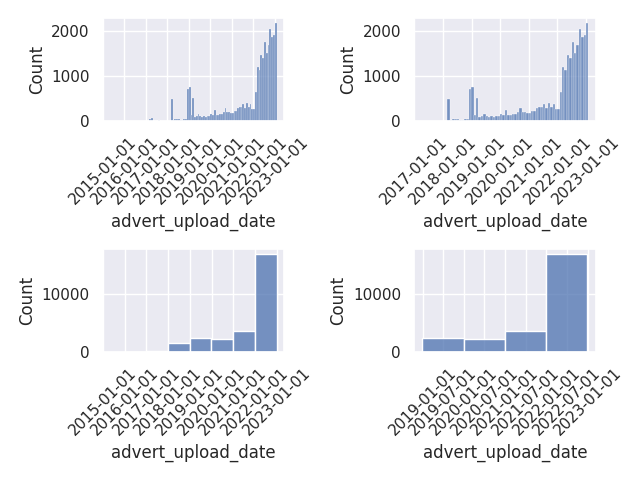

Removed rows where upload data <= 2017: 227 rows removed


In [8]:
fig, ax = plt.subplots(2,2)
g1 = sns.histplot(df, x='advert_upload_date',ax=ax[0,0],bins=monthly_bins)
g2 = sns.histplot(df, x='advert_upload_date',ax=ax[1,0],bins=yearly_bins)

print('Removed rows where upload data <= 2017: {} rows removed'.format(len(df[df["advert_upload_date"].dt.year <= 2017])))
df = df[(df['advert_upload_date'].dt.year > 2017)]

start_date =df['advert_upload_date'].min()
end_date = df['advert_upload_date'].max()
monthly_bins = mpl.dates.date2num(pd.date_range(start=start_date,end=end_date,freq='M'))
yearly_bins = mpl.dates.date2num(pd.date_range(start=start_date,end=end_date,freq='Y'))

g3 = sns.histplot(df, x='advert_upload_date',ax=ax[0,1],bins=monthly_bins)
g4 = sns.histplot(df, x='advert_upload_date',ax=ax[1,1],bins=yearly_bins)

g1.xaxis.set_ticks(g1.get_xticks())
g2.xaxis.set_ticks(g2.get_xticks())
g3.xaxis.set_ticks(g3.get_xticks())
g4.xaxis.set_ticks(g4.get_xticks())
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
g2.set_xticklabels(g2.get_xticklabels(), rotation=45)
g3.set_xticklabels(g3.get_xticklabels(), rotation=45)
g4.set_xticklabels(g4.get_xticklabels(), rotation=45)
fig.tight_layout()

## 1. Visualise data

### 1.1 Examine the two types of date information

Two dates are presented in the dataset:

- advert_upload_date
- advert_last_update_date

Tihs section examines which one is useful for data analysis.

As can be seen below, 'advert_upload_date' seems to be reasonable, as this seems to show a distribution of listings over the time period.

<IPython.core.display.Javascript object>


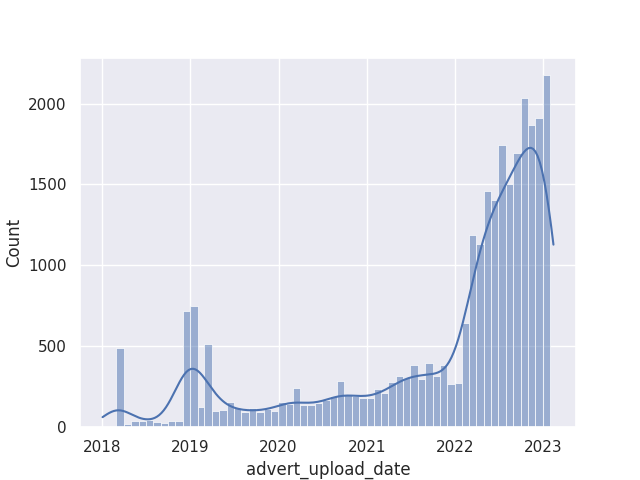

<Axes: xlabel='advert_upload_date', ylabel='Count'>

In [9]:
fig, ax = plt.subplots(1,1)
sns.histplot(df, x='advert_upload_date',kde=True,ax=ax,bins=monthly_bins)

However, if examining the distributions, we see that while the marginal distributions shows that 'advert_upload_date' varies over time, 'advert_last_update_date' is heavily skewed towards recent datetimes. This suggests that the listings are updated very often, and may not not useful data. 

<IPython.core.display.Javascript object>


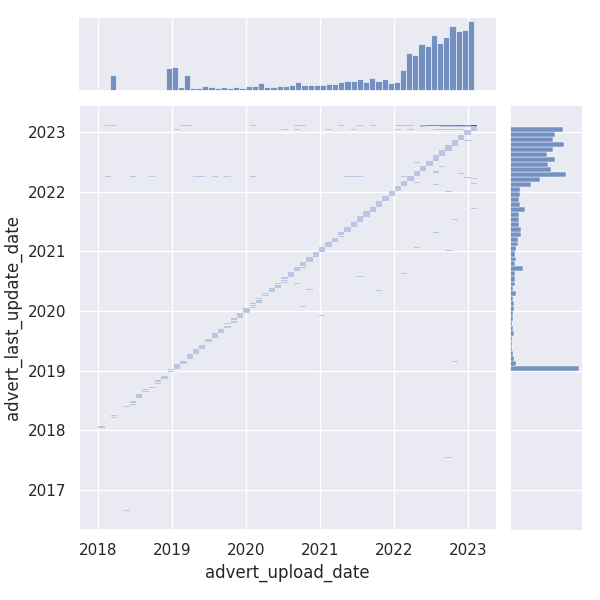

In [10]:
sns.jointplot(data=df, x="advert_upload_date", y="advert_last_update_date",kind='hist',
              marginal_kws=dict(bins=monthly_bins))

This can be verified by looking at the frequency of the listings 'hour' of the day it was updated. In this, it is seen that by far the majority of updates is at 01:00, indicating an automated job. As such, 'advert_last_update_date' is probably not useful, and 'advert_upload_date' will be used for analysis.

<IPython.core.display.Javascript object>


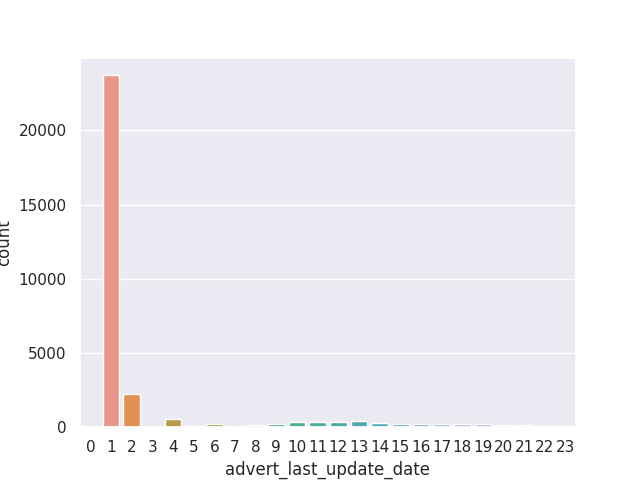

<Axes: xlabel='advert_last_update_date', ylabel='count'>

In [11]:
fig, ax = plt.subplots()
sns.countplot(x=df["advert_last_update_date"].dt.hour,ax=ax)

### 1.2 Visualise the average price

Price changes over a historical period can provide interesting information about a market. 

In this section the dataset is evaluated temporally, and compared against a known residential property index.

In [12]:
# Load the Q:HR:N:628 dataset of Croatian property prices
# Bank for International Settlements, Residential Property Prices for Croatia [QHRN628BIS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/QHRN628BIS, March 7, 2023.
df_QHRN628BIS = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=QHRN628BIS&scale=left&cosd=2002-01-01&coed=2022-07-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-03-07&revision_date=2023-03-07&nd=2002-01-01')
df_QHRN628BIS["DATE"] = pd.to_datetime(df_QHRN628BIS['DATE'], format='%Y-%m-%d')

<IPython.core.display.Javascript object>


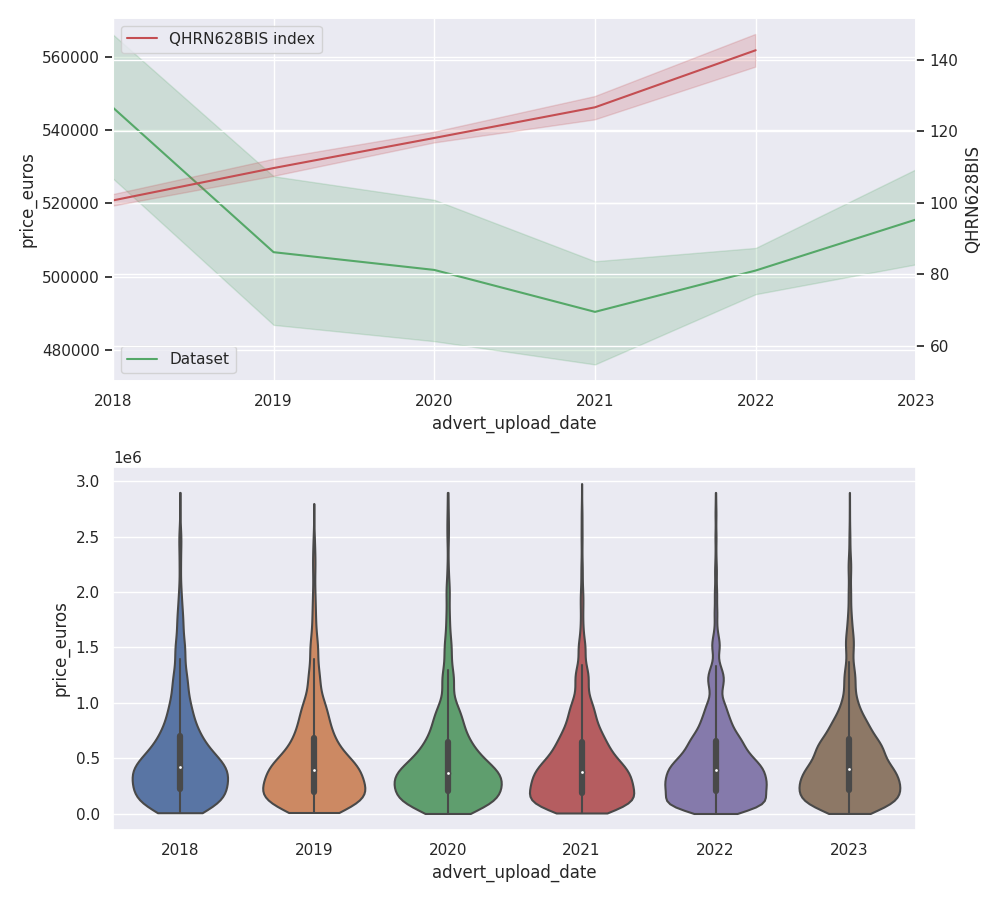

In [13]:
# Plot a yearly average

fig, ax = plt.subplots(2,1,figsize=(10,9))

g1 = sns.lineplot(data=df,x=df["advert_upload_date"].dt.year, y="price_euros",ax=ax[0],
                  errorbar='ci',label='Dataset',color='g')
ax[0].legend(loc=3)

# Plot the residential property index against this.
# While the scale is different, the trend comparison doesn't rely on that
ax2 = ax[0].twinx()
g2 = sns.lineplot(x=df_QHRN628BIS["DATE"].dt.year, y=df_QHRN628BIS["QHRN628BIS"],errorbar='ci', ax=ax2, legend=False, color="r",label='QHRN628BIS index')
ax2.legend(loc=0)
plt.xlim([2018,2023])

# Plot the yearly average as a violin plot
g3 = sns.violinplot(x=df["advert_upload_date"].dt.year, y=df["price_euros"], cut=0,ax=ax[1],split=True)

fig.tight_layout()

Per region

<IPython.core.display.Javascript object>


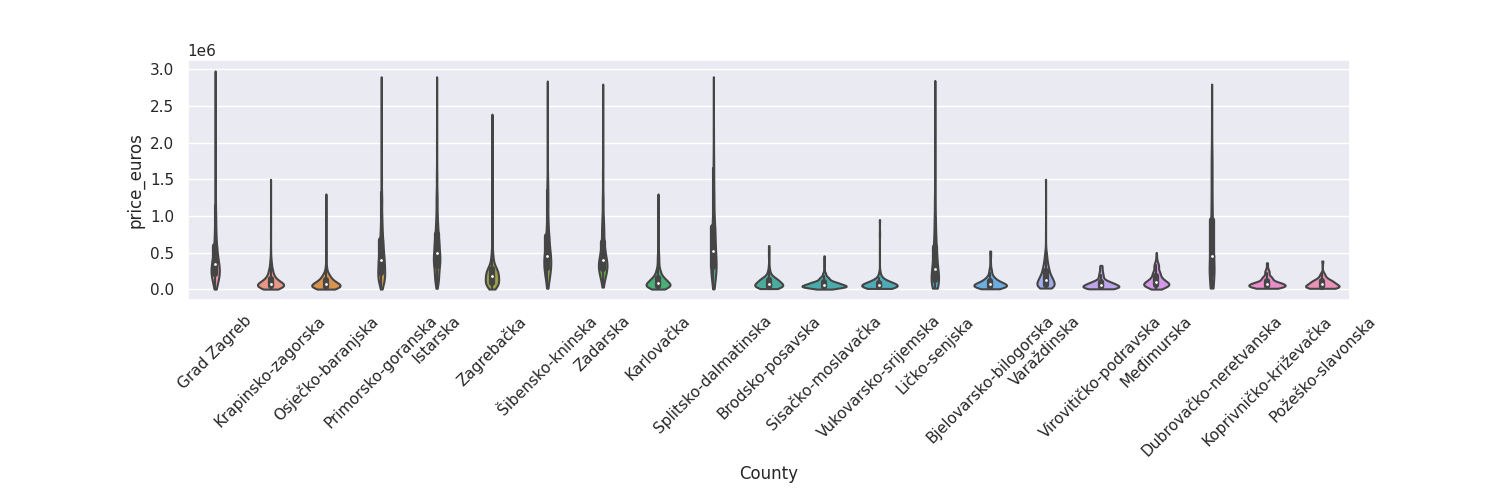

In [14]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.violinplot(x=df["County"], y=df["price_euros"],cut=0,ax=ax,split=True)
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.4)

### 1.3 Visualise information about the location of the properties

#### Show the distribution of property locations

From this, we can see that the distribution of properties (A) is focused along the coastal region, and Zagreb, and that the average price (B) is also correlated with location.

<IPython.core.display.Javascript object>


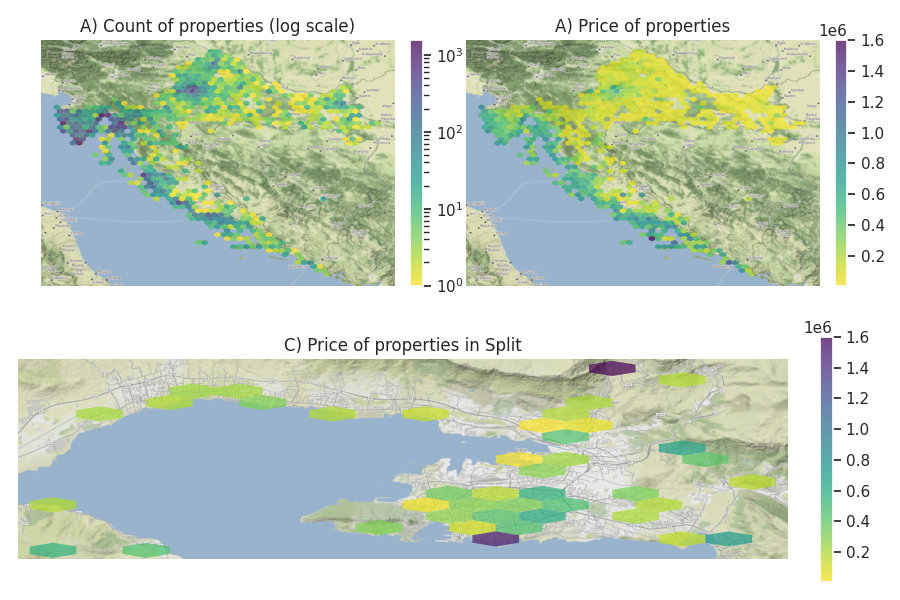

In [15]:
import contextily
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(9,6),layout='tight')
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# A) Plot hexbins of the count of all listings over the country (log scale)
ha = ax1.hexbin(
    df["location.lookup.longitude"],
    df["location.lookup.latitude"],
    gridsize=50,
    linewidths=0,
    alpha=0.7,
    cmap="viridis_r",
    bins='log',
)
contextily.add_basemap(
    ax1,
    crs="EPSG:4326",
    attribution = False,
);
plt.colorbar(ha,ax=ax1,fraction=0.035, pad=0.04)
ax1.set_title('A) Count of properties (log scale)')

# B) Plot hexbins of the price of all listings over the country
hb = ax2.hexbin(
    df["location.lookup.longitude"],
    df["location.lookup.latitude"],
    C=df["price_euros"],
    gridsize=50,
    linewidths=0,
    alpha=0.7,
    cmap='viridis_r',
)
contextily.add_basemap(
    ax2,
    crs="EPSG:4326",
    attribution = False,
);
plt.colorbar(hb,ax=ax2,fraction=0.035, pad=0.04)
ax2.set_title('A) Price of properties')


# c) Plot hexbins of the price of all listings over a Town
long_range = [16.3,16.55]
lat_range = [43.45,43.57]
df_range = df[
        (df["location.lookup.longitude"]>long_range[0]) 
        &(df["location.lookup.longitude"]<long_range[1])
        &(df["location.lookup.latitude"]>lat_range[0])
        &(df["location.lookup.latitude"]<lat_range[1])
    ] 
hc = ax3.hexbin(
        df_range["location.lookup.longitude"],
        df_range["location.lookup.latitude"],
    C = df_range['price_euros'],
    gridsize=15,
    linewidths=0,
    alpha=0.7,
    cmap="viridis_r",
)
contextily.add_basemap(
    ax3,
    crs="EPSG:4326",
    attribution = False,
);
plt.colorbar(hb,ax=ax3,fraction=0.035, pad=0.04)
ax3.set_title('C) Price of properties in Split')

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

# 2. Explore relationships

Given the above data visualisation, this section delves deeper into explaining the relationships between variables.

Specifically, this section will investigate the role that the binary variable *'is_estate_agent'* has on other variables. Note, determining if the listing user is an estate agent is an approximation, based on the following criteria:

A listing is recorded as being posted by an estate agent if:
- The listing contains a reference ID (these are non-standardised IDs, but may take the form ID:XXX)
- The user who posted the listing has multiple properties for sale
- Listing photographs contain watermarks, or are (subjectively) of a professional quality (lighting, angle, etc)

As such, this variable is approximate, and will likely contain errors due to misclassification. However, given the number of samples avaliable in this dataset, average trends can still be observed.

## 2.1 Conditional probability

The following will examine what the probability of events in the dataset (e.g. price), given information about if the listing is posted by an estate agent.

Specifically, 

$P(X | \text{'is_estate_agent'} == \text{True})$

Conditional probability can be performed with pandas: 

In [16]:
p = pd.crosstab(df['price_euros'], df['is_estate_agent'], normalize='columns')
p.head()

is_estate_agent,False,True
price_euros,,
1050,0.000000,0.000035
1065,0.000442,0.000000
1200,0.000442,0.000000
1259,0.000442,0.000000
1300,0.000442,0.000000


Or visualised with the *hue* parameter in seaborn.

## 2.2 Visualisation of data

Specifically, the below demonstrates that:

1) The distributions of prices (A) can be split into distributions conditional on the 'is_estate_agent' variable  (B), and show that not only are the sample sizes between the two classes vastly different, but the average average prices also vary. This can be further examined by looking at the eCDF of the two conditional distributions (C), which shows that when plotted as a proportion of the class (i.e. to remove sample size difference), a greater proportion of listings associated with the 'is_estate_agent' variable are of a higher price.

2) There exists in the dataset a field denoting the avaliable living area for a listing. In this, it is seen that the vast majority of listings leave this field blank (D), and this is especially true for listings associated with the 'is_estate_agent' variable (E,F). However, in constrast to the conditional probability of price, here it is seen that even if there is a difference in if the field is filled in, the 'is_estate_agent' field only seems to weakly correlate with the actual avaliable living space (H,I). In other words, the probability of living area field being filled in is correlated with the 'is_estate_agent' variable, however, the area for non-empty listings does not.

<IPython.core.display.Javascript object>


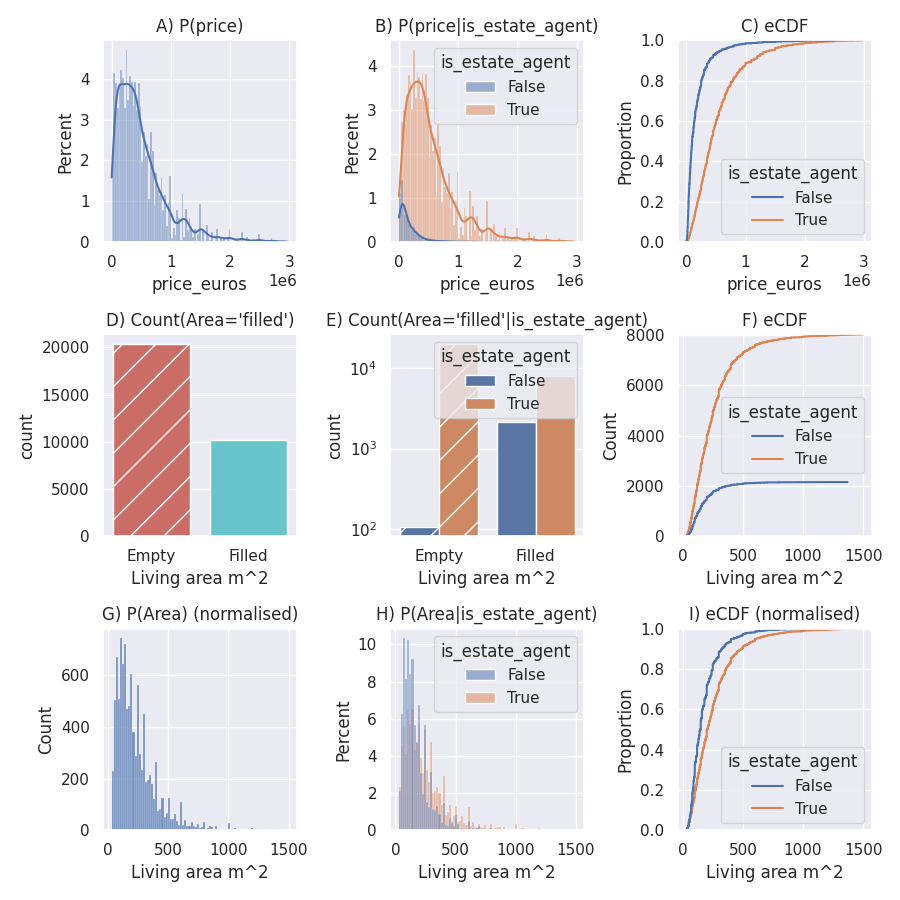

In [17]:
fig, ax = plt.subplots(3,3,figsize=(9,9))

# A) Plot a histogram of all the prices
sns.histplot(df, x='price_euros', kde=True,stat='percent',ax=ax[0,0]).set(title='A) P(price)')

# B) Plot a histogram conditional on is_estate_agent
sns.histplot(df, x='price_euros', kde=True,stat='percent',ax=ax[0,1],hue='is_estate_agent').set(title='B) P(price|is_estate_agent)')

# C) Plot the eCDF
sns.ecdfplot(data=df,x='price_euros',stat='proportion',hue='is_estate_agent',ax=ax[0,2]).set(title='C) eCDF')

# D) Plot a barchart of the living area for all listings
g = sns.countplot(x=pd.notna(df['Living area m^2']),palette='hls',ax=ax[1,0]).set(title='D) Count(Area=\'filled\')')
ax[1,0].patches[0].set_hatch('/')
ax[1,0].set_xticks(range(2), labels=['Empty','Filled'])

# E) Plot a barchart of the living area conditional on is_estate_agent
g = sns.countplot(x=pd.notna(df['Living area m^2']),ax=ax[1,1],hue=df['is_estate_agent']).set(title='E) Count(Area=\'filled\'|is_estate_agent)')
ax[1,1].patches[0].set_hatch('/')
ax[1,1].patches[2].set_hatch('/')
ax[1,1].set_xticks(range(2), labels=['Empty','Filled'])
ax[1,1].set_yscale('log')

# F) Plot the eCDF
sns.ecdfplot(data=df,x='Living area m^2',hue='is_estate_agent',stat='count',ax=ax[1,2]).set(title='F) eCDF')

# G) Plot a histogram of the living area
sns.histplot(df, x='Living area m^2',ax=ax[2,0]).set(title='G) P(Area) (normalised)')
# H) Plot a histogram of the living area conditional on is_estate_agent
sns.histplot(df, x='Living area m^2',stat='percent',common_norm=False,ax=ax[2,1],hue='is_estate_agent').set(title='H) P(Area|is_estate_agent)')
# I) Plot the eCDF
sns.ecdfplot(data=df,x='Living area m^2',hue='is_estate_agent',ax=ax[2,2]).set(title='I) eCDF (normalised)')

fig.tight_layout()

## 2.3 Temporal data

This correlation between price and 'is_estate_agent' is also seen when looking at the historical data over time. In this, it is seen below that the average price per year is much higher. In particular, the distribution of prices each year also skews depending on this variable

<IPython.core.display.Javascript object>


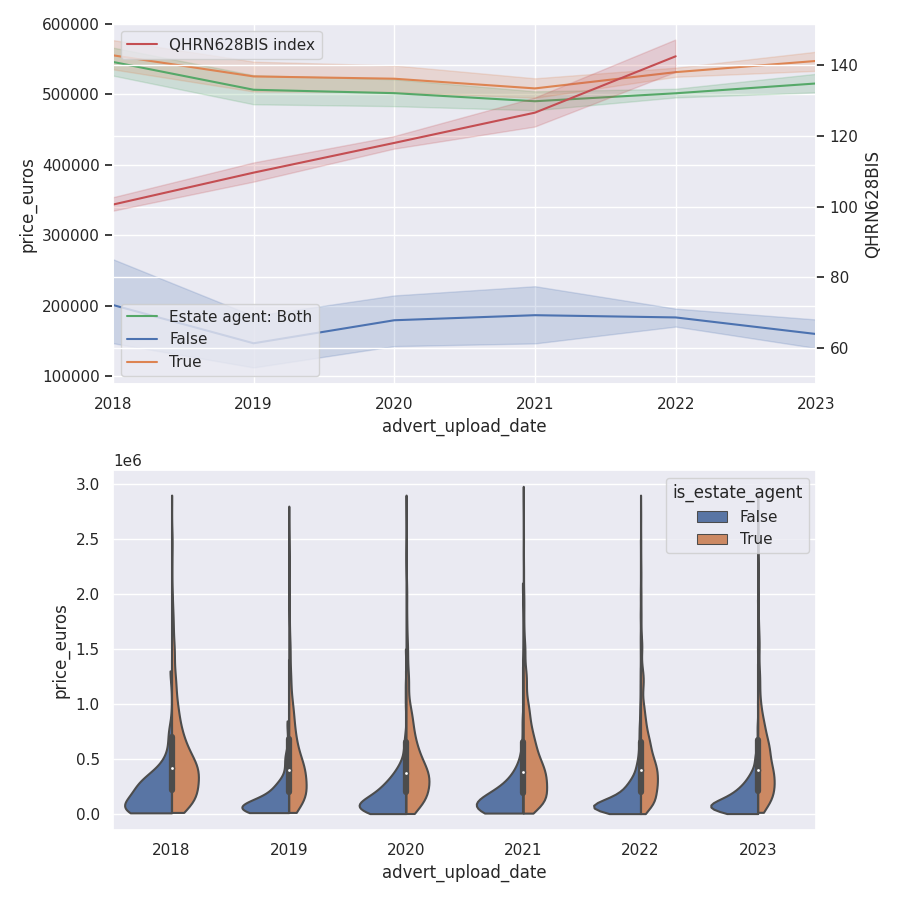

In [18]:
fig, ax = plt.subplots(2,1,figsize=(9,9),layout='tight')
# Plot a yearly average
g1 = sns.lineplot(data=df,x=df["advert_upload_date"].dt.year, y="price_euros",ax=ax[0],label='Estate agent: Both',color='g')
g2 = sns.lineplot(data=df,x=df["advert_upload_date"].dt.year, y="price_euros",hue='is_estate_agent',ax=ax[0])
ax[0].legend(loc=3)

# Plot the residential property index against this. While the scale is different, the trend comparison doesn't rely on that
ax2 = ax[0].twinx()
g3 = sns.lineplot(x=df_QHRN628BIS["DATE"].dt.year, y=df_QHRN628BIS["QHRN628BIS"],errorbar='sd', ax=ax2, legend=False, color="r",label='QHRN628BIS index')
ax2.legend(loc=0)
plt.xlim([2018,2023])

# Plot the yearly average as a violin plot
g4 = sns.violinplot(x=df["advert_upload_date"].dt.year, y=df["price_euros"], cut=0,ax=ax[1],hue=df['is_estate_agent'],split=True)

## 2.2 Location data

The follow section extends the analysis of 'is_estate_agent' to location data within Croatia.

In this, it is seen that the proportion of properties listed by estate agents is highest in the costial regions (A) from Istria all the way down through Dalmatia, and this decreases the further east. 

Additionally, the average change in price seems correlated (B), specifically, the average price increases for properties where 'is_estate_agent' is true along the coast, but actually decreases in the Slavonia region to the east. 

<IPython.core.display.Javascript object>


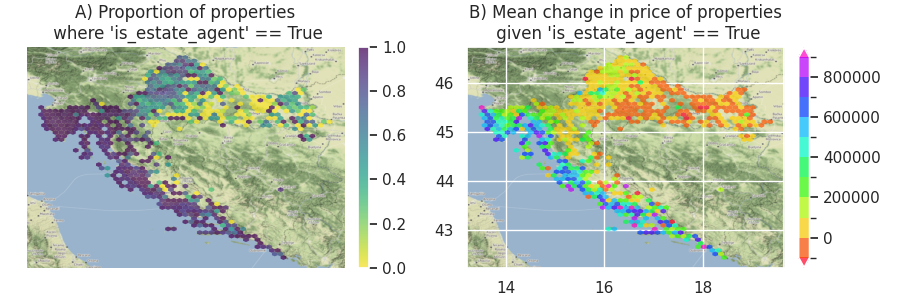

In [19]:
fig, ax = plt.subplots(1,2,figsize=(9,3))


# A) Plot hexbins of the proportion of listings where 'is_estate_agent' is true
ha = ax[0].hexbin(
    df["location.lookup.longitude"],
    df["location.lookup.latitude"],
    C=df["is_estate_agent"],
    gridsize=50,
    linewidths=0,
    alpha=0.7,
    cmap='viridis_r',
)
contextily.add_basemap(
    ax[0],
    crs="EPSG:4326",
    attribution = False,
);
plt.colorbar(ha,ax=ax[0],fraction=0.035, pad=0.04)
ax[0].set_title('A) Proportion of properties\n where \'is_estate_agent\' == True')


# B) Plot hexbins of the mean price difference given 'is_estate_agent'
# Specifically, the hexbix value C is the mean over the prices, where listings where 'is_estate_agent'==False
# are set as negative, and an average over this taken.  
cmap = mpl.cm.gist_rainbow
bounds = range(-100000,1000000,100000)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N,extend='both',)

hb = ax[1].hexbin(
    df["location.lookup.longitude"],
    df["location.lookup.latitude"],
    C=df[['price_euros','is_estate_agent']].apply(lambda x: -x['price_euros'] if x['is_estate_agent']==False else x['price_euros'], axis=1),
    gridsize=50,
    linewidths=0,
    alpha=0.7,
    cmap=cmap,
    norm=norm,
    reduce_C_function = np.mean
)
contextily.add_basemap(
    ax[1],
    crs="EPSG:4326",
    attribution = False,
);
plt.colorbar(hb,ax=ax[1],fraction=0.035, pad=0.04,format='%1.0f',)
ax[1].set_title('B) Mean change in price of properties\n given \'is_estate_agent\' == True')


ax[0].set_axis_off()
ax[0].set_axis_off()
fig.tight_layout()

# 3. Summary

This notebook has explored the used of data manipulation and visualisation methods in an example of property data. While this is not a comprehensive study, nor particularly revelationary, it demonstrates how these tools can be used to understand complex real-world datasets.